# Main Runner

In [7]:
from src.simulator import MarketSimulator
from src.experimental_config import generate_experiments

In [10]:
l = ["a", "b", "c", "d"]
for i in [1,2,3,4]:
    j=0
    while True:
        print(f"{i}:{l[j]}")
        j+=1
        if j == 2:
            break

1:a
1:b
2:a
2:b
3:a
3:b
4:a
4:b


## Imports

In [1]:
from objects import *
import pickle
import os
import plotly.express as px

## Generate Experiments

In [ ]:
prices = pd.read_parquet("raw_data/spx_stock_prices.parquet")
treasury_rate_files = ["daily-treasury-rates.csv"] + [f"daily-treasury-rates ({i}).csv" for i in range(1, 25)]
rates_df = [pd.read_csv(f"raw_data/{file}", index_col=0) for file in treasury_rate_files]
rates_df = pd.concat(rates_df)
rates_df.index = pd.to_datetime(rates_df.index)
# sort rates_df by date
rates_df = rates_df.sort_index()
print("Start Generation")
generate_experiments(prices, rates_df, 250, "experiments", lookback=48, error_max=10)

# Read in generated experiments
Only needed if running a single experiment. Otherwise, the experiments are read in from the ``experiments`` folder.

In [2]:
# Get all files in the experiments folder
experiment_names = os.listdir('experiments')
experiments = []
# read in pickle object
for e in experiment_names:
    with open(f"experiments/{e}", 'rb') as f:
        exp = pickle.load(f)
        experiments.append(exp)

In [6]:
policy = ColumnGenerationPolicy(experiments[3], sell_switch=True)
simulator = MarketSimulator(experiments[3], policy, verbose=False)
simulator.run()
simulator.total_trades

Current Portfolio Value at 2015-09-11: 184595.0
	 Optimizing with 31 time steps, 501 constraints, and 1178 variables...
	 Optimized. Time taken: 0.12061214447021484
Current Portfolio Value at 2015-09-14: 183039.85
	 Optimizing with 30 time steps, 485 constraints, and 1110 variables...
	 Optimized. Time taken: 0.06326127052307129
Current Portfolio Value at 2015-09-15: 185673.86000000002
	 Optimizing with 29 time steps, 469 constraints, and 1044 variables...
	 Optimized. Time taken: 0.08235383033752441
Current Portfolio Value at 2015-09-16: 187387.81000000003
	 Optimizing with 28 time steps, 453 constraints, and 980 variables...
	 Optimized. Time taken: 0.10147380828857422
Current Portfolio Value at 2015-09-17: 183854.7
	 Optimizing with 27 time steps, 437 constraints, and 918 variables...
	 Optimized. Time taken: 0.051927804946899414
Current Portfolio Value at 2015-09-18: 179472.30000000002
	 Optimizing with 26 time steps, 421 constraints, and 858 variables...
	 Optimized. Time taken: 0

3

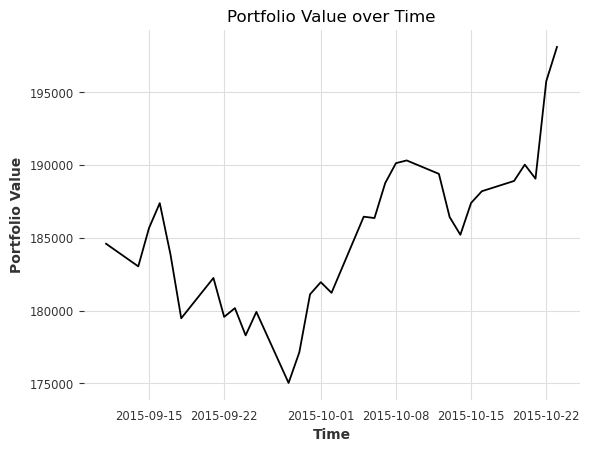

In [7]:
simulator.plot_value()

In [5]:
px.line(simulator.historical_portfolios)

In [6]:
pd.concat([experiments[3].initial_portfolio, experiments[3].final_portfolio], axis=1)

,2015-10-23 00:00:00,0
CTSH_86158,1441.00,1440.0
PBCT_12073,1440.00,1435.0
LNC_49015,1438.00,1439.0
cash,9.67,0.0


In [7]:
pd.concat(simulator.historical_portfolios, axis=1)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
CTSH_86158,1441.00,1441.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,...,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00
PBCT_12073,1440.00,1440.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,...,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00
LNC_49015,1438.00,1438.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,...,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00,1440.00
cash,9.67,9.67,43.96,43.96,43.96,43.96,43.96,43.96,43.96,43.96,...,43.96,43.96,43.96,43.96,43.96,43.96,43.96,43.96,43.96,43.96


## Evaluate Policies
Run multiple policies on a set of experiments.

In [ ]:
policies = [DIRECTIONAL_TRADING] + \
           [DIRECTIONAL_INCENTIVE_TRADING(0), DIRECTIONAL_INCENTIVE_TRADING(.25), DIRECTIONAL_INCENTIVE_TRADING(.5), DIRECTIONAL_INCENTIVE_TRADING(.75)] + \
           [NAIVE]
multi_sim = MultiSimRunner('experiments', policies, trim=29)
multi_sim.get_results("base_results29on.csv")

Running DirectionalIncentive_25.0 on 21_93324_93014_4:  11%|█▏        | 29/254 [22:19:41<7:48:25, 124.91s/it]         